# Introduction

**Forecasting is by far the most important and frequently used application of predictive analytics because it has significant impact on both the top line and the bottom line of an organization. Every organization prepares long-range and short-range planning and forcasting demand for product and service is an important input both long-range and short-range plannig.**

**Some of the examples of time-series forcastring/analysis:-**
1. Stock price analysis and stock price forecasting
2. Weather forecasting
3. Sales volume/revenue forecasting

**In this notebook, We will explore time-series data analysis models such as Moving-avearage. Auto-regressive methods and Auto-regressive integreated moving average (ARIMA).**

**Reference:** Machine learning by U Dinesh Kumar

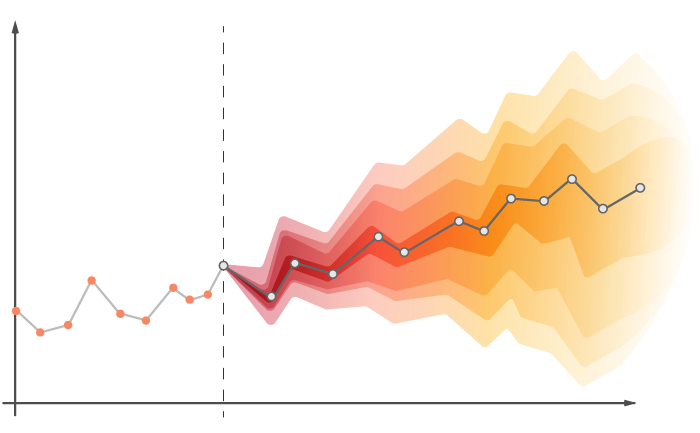

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/vimanaaircraftdataset/vimana.csv
/kaggle/input/storedataset/store.xls
/kaggle/input/timeseriesdatawsb/wsb.csv


In [2]:
# installing dependencies for reading excel files
!pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 920.7 kB/s eta 0:00:00


In [3]:
wsb_df = pd.read_csv("/kaggle/input/timeseriesdatawsb/wsb.csv")
wsb_df.head()

,Month,Sale Quantity,Promotion Expenses,Competition Promotion
0,1,3002666,105,1
1,2,4401553,145,0
2,3,3205279,118,1
3,4,4245349,130,0
4,5,3001940,98,1


In [4]:
cmap = sns.color_palette('Set2')
cmap

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [5]:
wsb_df.describe()

,Month,Sale Quantity,Promotion Expenses,Competition Promotion
count,48.00,4.800000e+01,48.000000,48.000000
mean,24.50,3.825340e+06,137.229167,0.395833
std,14.00,6.233543e+05,20.911403,0.494204
min,1.00,2.798343e+06,98.000000,0.000000
25%,12.75,3.338460e+06,120.750000,0.000000
50%,24.50,3.724724e+06,135.500000,0.000000
75%,36.25,4.322192e+06,157.000000,1.000000
max,48.00,5.431651e+06,170.000000,1.000000


In [6]:
def plot_function(var):
    plt.figure(figsize=(10,6))
    plt.plot(wsb_df['Month'], wsb_df[var], color=cmap[4])
    plt.xlabel("Months", fontsize=14)
    plt.ylabel(var , fontsize=14)
    plt.title(f"{var} over a months", fontsize=15)
    plt.show()

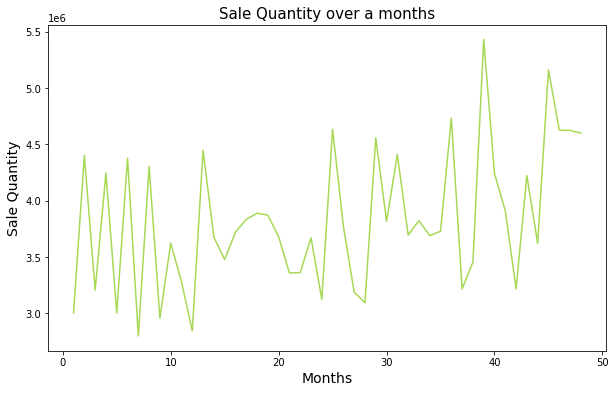

In [7]:
plot_function('Sale Quantity')

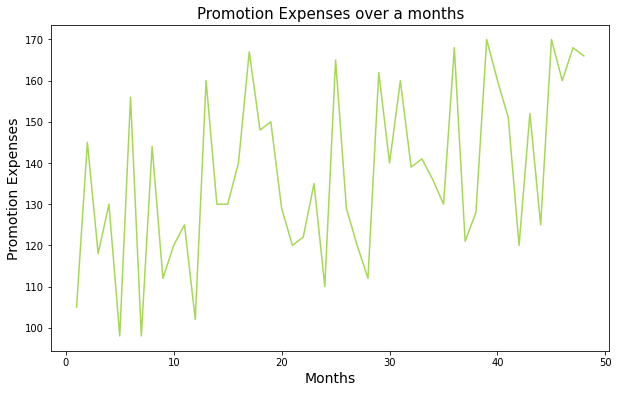

In [8]:
plot_function("Promotion Expenses")

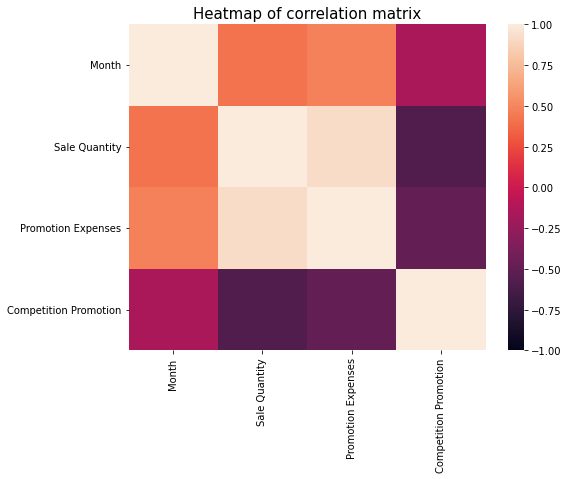

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(wsb_df.corr(), vmin=-1, vmax=+1)
plt.title("Heatmap of correlation matrix", fontsize=15)
plt.show()

In [10]:
wsb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Month                  48 non-null     int64
 1   Sale Quantity          48 non-null     int64
 2   Promotion Expenses     48 non-null     int64
 3   Competition Promotion  48 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB


## Moving Average

**Moving average is one of the simplest forecasting techniques which forecasts the future value of a time-series data using average(Weighted average) of the past N observations.**

**Pandas has a function `rolling()` which can be used with an aggregate function like mean() for calculating moving average for a time window. For example, to calculate 12 month's average using last 12 months' data starting from last month, rolling() will take a parameter window, which is set to 12 to indicate moving average of 12-months data, then use pandas' `shift()` function,which takes parameter 1 to specify that 12-months data should start from last month. shift(1) mesans calculating moving average for the specified window period starting from previous observations.**

In [11]:
wsb_df['mavg_12'] = wsb_df['Sale Quantity'].rolling(window = 12).mean().shift(1)

In [12]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
wsb_df[['Sale Quantity', 'mavg_12']][36:]

,Sale Quantity,mavg_12
36,3216483,3928410.33
37,3453239,3810280.00
38,5431651,3783643.33
39,4241851,3970688.42
40,3909887,4066369.08
41,3216438,4012412.75
42,4222005,3962369.58
43,3621034,3946629.42
44,5162201,3940489.50
45,4627177,4052117.17


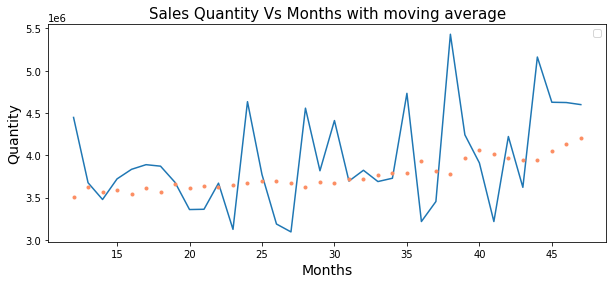

In [13]:
plt.figure(figsize=(10,4))
plt.plot(wsb_df['Sale Quantity'][12:])
plt.plot(wsb_df['mavg_12'][12:], '.', color=cmap[1])
plt.xlabel("Months", fontsize=14)
plt.ylabel("Quantity", fontsize=14)
plt.title("Sales Quantity Vs Months with moving average", fontsize=15)
plt.legend()

In [14]:
# Mean absolute percentage error of the forecasted sales quantity vs actual values 
def get_mape(actual, predicted):
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round(np.mean(np.abs((actual-predicted)/actual))*100, )

In [15]:
print("MAPE with Moving avearge is: ")
get_mape(wsb_df['Sale Quantity'][36:].values,
         wsb_df['mavg_12'][36:].values)

MAPE with Moving avearge is: 


14.0

In [16]:
# mean squared error of the moving average smoothing! 
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(wsb_df['Sale Quantity'][36:].values,
                           wsb_df['mavg_12'][36:].values))

734725.8359239782

## Exponential Smoothing

**One of the drawbacks of the simple moving average techniques is that it gives equal weight to all the previous obseravations used in forecasting the future value.** 

**Exponential smoothing technique assigns diffrential weights to past observations.**

**pandas `ewm()` method iprovides the features for computing th exponential moving average taking alpha as a parameter.**

In [17]:
wsb_df['ewm'] = wsb_df['Sale Quantity'].ewm(alpha=0.4).mean()

In [18]:
wsb_df[36:]

,Month,Sale Quantity,Promotion Expenses,Competition Promotion,mavg_12,ewm
36,37,3216483,121,1,3928410.33,3781000.55
37,38,3453239,128,0,3810280.00,3649895.93
38,39,5431651,170,0,3783643.33,4362597.96
39,40,4241851,160,0,3970688.42,4314299.18
40,41,3909887,151,1,4066369.08,4152534.31
41,42,3216438,120,1,4012412.75,3778095.78
42,43,4222005,152,0,3962369.58,3955659.47
43,44,3621034,125,0,3946629.42,3821809.28
44,45,5162201,170,0,3940489.50,4357965.97
45,46,4627177,160,0,4052117.17,4465650.38


In [19]:
# get MAPE for the exponential smoothing! 
print("Accuracy with Exponential smoothing is: ")
get_mape(wsb_df[['Sale Quantity']][36:].values,
         wsb_df[['ewm']][36:].values)

Accuracy with Exponential smoothing is: 


9.0

**MAPE is much lessor in EWM compared to previous smoothing method**

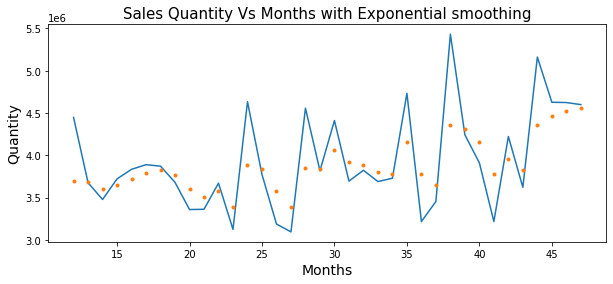

In [20]:
plt.figure(figsize=(10,4))
plt.plot(wsb_df['Sale Quantity'][12:])
plt.plot(wsb_df['ewm'][12:], '.')
plt.xlabel("Months", fontsize=14)
plt.ylabel("Quantity", fontsize=14)
plt.title("Sales Quantity Vs Months with Exponential smoothing", fontsize=15)
plt.show()

## Decomposing time series

**the time-series data can be modelled as addition or product of trend, seasonality, cyclical, and irregular components. the additive time-series model is given by**

  Yt = Tt + St + Ct + It
  
**the multiplicative time-series model is given by**

  Yt = Tt x St x Ct x It
  
 Where,  Tt = Trend component
         St = Seasonality 
         Ct = cyclical component
         It = irregular componenent

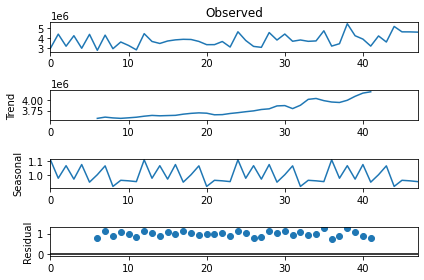

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose 

ts_decompose = seasonal_decompose(np.array(wsb_df['Sale Quantity']), 
                                  model='multiplicative', 
                                  period=12)

ts_decompose.plot()
plt.show()

In [22]:
# add seasonal and trend components to the dataframe
wsb_df['seasonal'] = ts_decompose.seasonal
wsb_df['trend'] = ts_decompose.trend
wsb_df.head(10)

,Month,Sale Quantity,Promotion Expenses,Competition Promotion,mavg_12,ewm,seasonal,trend
0,1,3002666,105,1,NaN,3002666.00,1.11,NaN
1,2,4401553,145,0,NaN,3876970.37,0.98,NaN
2,3,3205279,118,1,NaN,3534270.69,1.07,NaN
3,4,4245349,130,0,NaN,3861053.00,0.97,NaN
4,5,3001940,98,1,NaN,3488432.86,1.08,NaN
5,6,4377766,156,0,NaN,3861575.46,0.95,NaN
6,7,2798343,98,1,NaN,3424034.12,1.00,3563622.79
7,8,4303668,144,0,NaN,3781898.42,1.07,3593567.25
8,9,2958185,112,1,NaN,3449058.79,0.92,3574635.12
9,10,3623386,120,0,NaN,3519213.88,0.96,3564106.88


# ARIMA MODELS

## Auto regressive (AR) model

<AxesSubplot:xlabel='Month', ylabel='demand'>

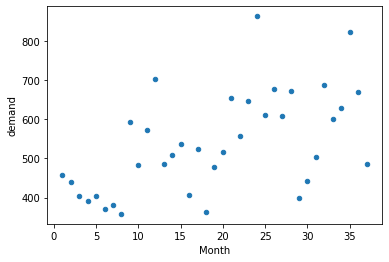

In [23]:
vim_df = pd.read_csv("/kaggle/input/vimanaaircraftdataset/vimana.csv")
vim_df.plot(kind='scatter', x='Month', y='demand')

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

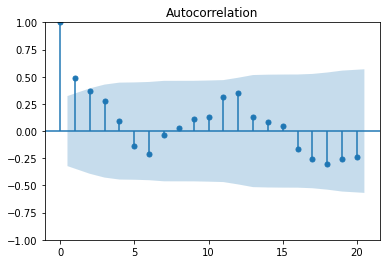

In [25]:
# show the autocorelation upto lag 20
acf_plot = plot_acf( vim_df.demand, lags=20)

**The shaded area represents the upper and lower bounds for critical values, where the null hypothesis cannot be rejected(autocorrelation value is 0). So, as can be seen from abive plot null hypothesis is rejected only for lag=1.**

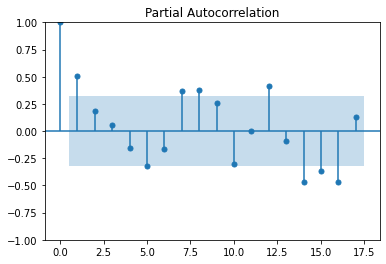

In [26]:
# plot the partial autocorrelation plot
pacf_plot = plot_pacf(vim_df.demand, lags=17)

**So from above plots we can see for only lag=1 we have statistically significant (p) value.**

In [27]:
# we will build AR model using p=1 only.
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(vim_df.demand[:30].astype(np.float64), order=(1,0,0))
ar_model = arima.fit()
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 demand   No. Observations:                   30
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -182.765
Date:                Thu, 16 Jun 2022   AIC                            371.530
Time:                        10:46:57   BIC                            375.734
Sample:                             0   HQIC                           372.875
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        513.4426     43.815     11.718      0.000     427.567     599.318
ar.L1          0.4726      0.181      2.617      0.009       0.119       0.827
sigma2      1.136e+04   3299.003      3.444      0.001    4896.110    1.78e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                 1.72
Prob(Q):                              0.46   Prob(JB):                         0.42
Heteroskedasticity (H):               2.72   Skew:                             0.59
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
# forcast on new data which from 31 to 37
forecast_31_371 = ar_model.predict(30,36)
forecast_31_371

30   480.15
31   497.71
32   506.01
33   509.93
34   511.78
35   512.66
36   513.07
Name: predicted_mean, dtype: float64

In [29]:
# calculate the accuracy
get_mape(vim_df.demand[30:],
        forecast_31_371)

19.0

**Mean absolute percentage erroer comes around 19% with Auto regressive model**

## Moving Average (MA) model

In [30]:
# Let's build MA model using q lags=1
arima = ARIMA(vim_df.demand[0:30].astype(np.float64), order = (0,0,1))
ma_model = arima.fit()
ma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 demand   No. Observations:                   30
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -184.297
Date:                Thu, 16 Jun 2022   AIC                            374.595
Time:                        10:46:57   BIC                            378.799
Sample:                             0   HQIC                           375.940
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.0213     31.024     16.665      0.000     456.215     577.827
ma.L1          0.3173      0.224      1.414      0.157      -0.122       0.757
sigma2      1.265e+04   4209.484      3.004      0.003    4395.561    2.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 2.21
Prob(Q):                              0.52   Prob(JB):                         0.33
Heteroskedasticity (H):               2.25   Skew:                             0.66
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
# forecast for unseen data
forecast_31_372 = ma_model.predict(30, 36)
forecast_31_372

30   509.88
31   517.02
32   517.02
33   517.02
34   517.02
35   517.02
36   517.02
Name: predicted_mean, dtype: float64

In [32]:
# find the mean absolute percentage error
get_mape(vim_df.demand[30:], forecast_31_372)

18.0

**Mean Absolute percentage error is about 18% which is lessor than AR model.**

## Auto regressive moving average (ARMA) model

In [33]:
# we will build combine model of AR(p) and MA(q) process to build ARIMA model
arima = ARIMA(vim_df.demand[0:30].astype(np.float64), order=(1,0,1))
arma_model = arima.fit()
arma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 demand   No. Observations:                   30
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -181.846
Date:                Thu, 16 Jun 2022   AIC                            371.692
Time:                        10:46:58   BIC                            377.296
Sample:                             0   HQIC                           373.485
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        508.3844     59.146      8.595      0.000     392.461     624.308
ar.L1          0.7421      0.316      2.348      0.019       0.123       1.362
ma.L1         -0.3395      0.539     -0.629      0.529      -1.397       0.718
sigma2      1.065e+04   3040.079      3.505      0.000    4696.418    1.66e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.46
Prob(Q):                              0.72   Prob(JB):                         0.29
Heteroskedasticity (H):               3.07   Skew:                             0.67
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
# forecast on unseen data
forecast_31_373 = arma_model.predict(30, 36)
forecast_31_373

30   477.81
31   485.69
32   491.54
33   495.89
34   499.11
35   501.50
36   503.28
Name: predicted_mean, dtype: float64

In [35]:
# get the Mean absolute percentage error
get_mape(vim_df.demand[30:], forecast_31_373)

20.0

**Mean abosolute percentage error is higher than previous models**

## Auto regressive integrated moving average (ARIMA) model

In [36]:
# let's build ARIMA model with p,d,q = (1,1,1)
arima = ARIMA(vim_df.demand[0:30].astype(np.float64), order=(1,1,1))
arima_model = arima.fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 demand   No. Observations:                   30
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -177.184
Date:                Thu, 16 Jun 2022   AIC                            360.369
Time:                        10:46:58   BIC                            364.470
Sample:                             0   HQIC                           361.653
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3445      0.556     -0.619      0.536      -1.435       0.746
ma.L1         -0.1792      0.574     -0.312      0.755      -1.303       0.945
sigma2      1.176e+04   2853.666      4.122      0.000    6169.819    1.74e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.87   Prob(JB):                         0.63
Heteroskedasticity (H):               3.30   Skew:                             0.40
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**None of the processes are statistically significant, though we will check MAPE of ARIMA model.**

In [37]:
# forecast on unseen data
forecast_31_374 = arima_model.predict(30, 36)
forecast_31_374

30   445.21
31   444.45
32   444.71
33   444.62
34   444.65
35   444.64
36   444.65
Name: predicted_mean, dtype: float64

In [38]:
# calculate MAPE
get_mape(vim_df.demand[30:], forecast_31_374)

27.0

**MAPE is much higher than other models, ARIMA is not at all good model for this time-series, we will go with AR model for forcasting future values.**

**Here our Time-series is stationary so ARMA model is used compared to ARIMA model. ARIMA model is used only when time-series is non-stationary.**

# Stationarility (Dicky-Fullar test) and ARIMA model 

**ARMA models can only be used when the time-series data is stationary. ARIMA models are used when the time-series data is no-stionary. Time-series data is called stationary if the mean, variance, and covariance are constant over time. ARIMA model which was proposed by Box and Jenkins have Three components:-**

1. AR component with p lags AR(P)
2. Integratoin component (d)
3. Moving average (MA) component with q lags.

**the main obejective of the integration component is to `convert a non-stationary time-series process to a stationary procsess` so that AR and MA process can be used for forecasting. when the data is non-stationary, the ACF will not cut-off to zero quickly: rather ACF may show a very slow decline.**

In [39]:
# let's check store dataset
store_df = pd.read_excel('/kaggle/input/storedataset/store.xls')
store_df.head(10)

,Date,demand
0,2014-10-01,15
1,2014-10-02,7
2,2014-10-03,8
3,2014-10-04,10
4,2014-10-05,13
5,2014-10-06,5
6,2014-10-07,12
7,2014-10-08,12
8,2014-10-09,13
9,2014-10-10,13


In [40]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    115 non-null    datetime64[ns]
 1   demand  115 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


In [41]:
# reset index with date and time index
store_df.set_index(pd.to_datetime(store_df.Date), inplace=True)
store_df1 = store_df.drop('Date', axis=1)
store_df1[:5]

,demand
Date,
2014-10-01,15
2014-10-02,7
2014-10-03,8
2014-10-04,10
2014-10-05,13


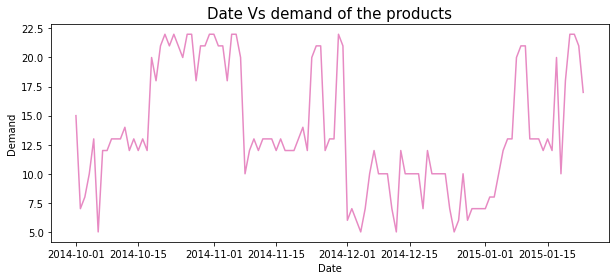

In [42]:
plt.figure(figsize=(10,4))
plt.plot(store_df1.demand, color=cmap[3])
plt.xlabel("Date")
plt.ylabel('Demand')
plt.title('Date Vs demand of the products', fontsize=15)
plt.show()

**We can see the store demand is fluctuations are much higher, mean and variance are not same over the period of time.**

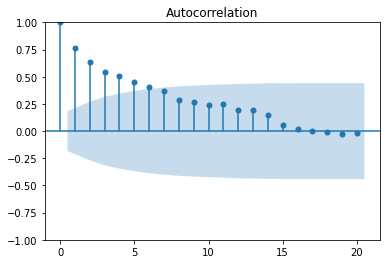

In [43]:
# acf plot for the store demand time-series
acf_plot2 = plot_acf(store_df1.demand, lags=20)

**In Above plot, autocorrelation is declining slowly instead of quick cuts-off to the zero. this indicates the time-series is non-stationary.**

## Dicky-Fuller Test

**To test dicky-fuller test we can setup null-hypothesis and alternative hypothesis.**

>H0: Time-series is non-stationary

>Ha: Time-series is a stationary 

**If p-value is less than 0.05 then we will reject the null hypothesis and accept the alternative hypothesis.**

In [44]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(ts):
    adfuller_result = adfuller(ts, autolag=None)
    adfuller_out = pd.Series(adfuller_result[0:4], index=['Test Statistic',
                                                         'p-value',
                                                         'Lags Used',
                                                         'Number of Observations Used'])
    print(adfuller_out)

In [45]:
adfuller_test(store_df1.demand)

Test Statistic                 -1.65
p-value                         0.46
Lags Used                      13.00
Number of Observations Used   101.00
dtype: float64


**p-value is much greater than 0.05, hence we cannot reject null-hypothesis. so it proves that our time-series is non-stationary.**

## Differencing

In [46]:
# diffrencing the time-series to make it stationary.
store_df1['Demand_diff'] = store_df1.demand - store_df1.demand.shift(1)
store_df1.head(5)

,demand,Demand_diff
Date,,
2014-10-01,15,NaN
2014-10-02,7,-8.00
2014-10-03,8,1.00
2014-10-04,10,2.00
2014-10-05,13,3.00


In [47]:
# removing mising rows
store_diff_df = store_df1.copy()
store_diff_df.dropna(inplace=True)
store_diff_df.head()

,demand,Demand_diff
Date,,
2014-10-02,7,-8.00
2014-10-03,8,1.00
2014-10-04,10,2.00
2014-10-05,13,3.00
2014-10-06,5,-8.00


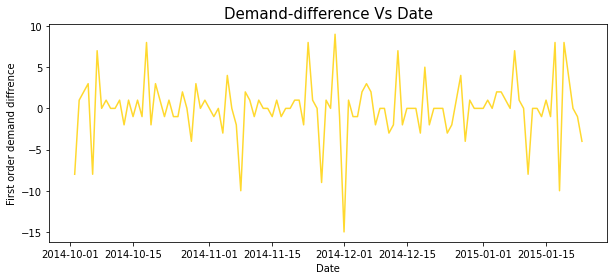

In [48]:
plt.figure(figsize=(10,4))
plt.plot(store_diff_df.Demand_diff, color=cmap[5])
plt.xlabel("Date")
plt.ylabel("First order demand diffrence")
plt.title("Demand-difference Vs Date", fontsize=15)
plt.show()

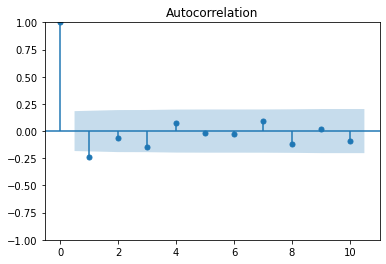

In [49]:
# plot the acf for calculating lag (d)
acf_plot1 = plot_acf(store_diff_df.Demand_diff, lags=10)

**Here `acf` plots immediately cuts off to the Zero. so we can keep lag=1 for our integration component.**

## ARIMA model with non-stationary time-series

In [50]:
# split traina and test time-series
store_train = store_df1[0:100]
store_test = store_df1[100:]
store_train.head()

,demand,Demand_diff
Date,,
2014-10-01,15,NaN
2014-10-02,7,-8.00
2014-10-03,8,1.00
2014-10-04,10,2.00
2014-10-05,13,3.00


In [51]:
# Build ARIMA model to train the time series 
arima = ARIMA(store_train.demand.astype(np.float64), order= (1,1,1))
arima_model = arima.fit()
arima_model.summary()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 demand   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -256.910
Date:                Thu, 16 Jun 2022   AIC                            519.821
Time:                        10:47:01   BIC                            527.606
Sample:                    10-01-2014   HQIC                           522.971
                         - 01-08-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4091      0.311      1.315      0.189      -0.201       1.019
ma.L1         -0.7179      0.236     -3.039      0.002      -1.181      -0.255
sigma2        10.4865      1.026     10.223      0.000       8.476      12.497
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                75.18
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -0.79
Prob(H) (two-sided):                  0.44   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Both Auto-regressive and Moving average processes are statistically significant in ARIMA model.**

**ARIMA model is a regression model and thus has to satisfy all the assumptions of regression. The residuls should be white noise and note correlated. This can be observed by using ACF and PACF plopt sof the residuals.** 

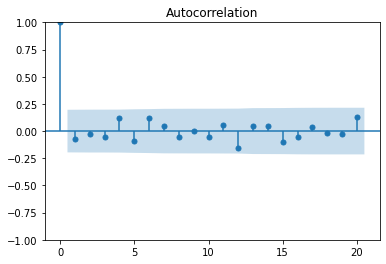

In [52]:
# let's plot the acf & pacf plots of residuals of arima model
acf_plot = plot_acf(arima_model.resid, lags=20)

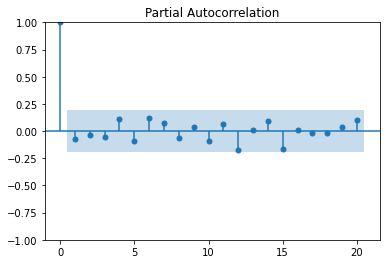

In [53]:
pacf_plot = plot_pacf(arima_model.resid, lags=20)

In [54]:
# forecasr the next 15 valuee from the model
model_predict = arima_model.forecast(15)
model_predict

2015-01-09   17.25
2015-01-10   16.13
2015-01-11   15.67
2015-01-12   15.48
2015-01-13   15.40
2015-01-14   15.37
2015-01-15   15.36
2015-01-16   15.35
2015-01-17   15.35
2015-01-18   15.35
2015-01-19   15.35
2015-01-20   15.35
2015-01-21   15.35
2015-01-22   15.35
2015-01-23   15.35
Freq: D, Name: predicted_mean, dtype: float64

In [55]:
# check the accuracy
get_mape(store_test.demand, model_predict[1])

26.0

**Forecating loss comes around 26%**

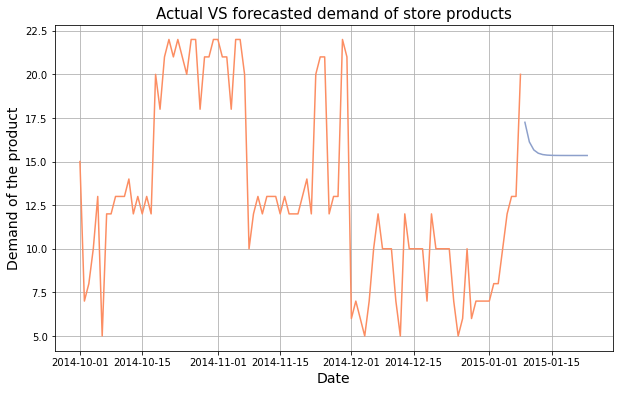

In [56]:
# plot the actual vs forecasted
plt.figure(figsize=(10,6))
plt.plot(store_df1.demand[:100], color=cmap[1])
plt.plot(model_predict, color=cmap[2])
plt.title("Actual VS forecasted demand of store products" , fontsize=15)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Demand of the product", fontsize=14)
plt.grid()
plt.show()

**Above, plot shows actual and forecasted demand of products for store.**

# Conclusions:

1. In this noteboook we saw about time-series forecasting and its various methods in applications
2. We learned Moving average, exponential smoothing and seasonal decomposition of time-series.
3. We also learned various models of ARIMA like auto-regressive, moving average process, ARMA for stationary time-series and ARIMA for non-staionary time-series
4. We learned that by differencing we can convert non-stationary time-series into stationary time-series.
5. We used dicky-fuller test to check whether or not time-series stationary or not.